In [111]:
import torch.optim as optim
from pytorch_model_summary import summary
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,3)


In [127]:
# Import functions get_digits_loaders, get_mnist_loaders, get_labels 
%run Datasets.ipynb

# Import baseline RNN, reservoir RNN
%run Networks.ipynb

# Import the training and evaluation functions + their corresponding auxiliary functions. 
%run Operations.ipynb

# Import the evolutionary algorithm
%run EA.ipynb

In [113]:
# Define parameters
input_size_digits = 64  # 8 * 8 pixels
input_size_mnist = 784  # 28 * 28 pixels

# for reservoir
reservoir_size = 128

# for baseline
n_hidden = 128

n_labels = 10
lr_SGD = 0.0001
momentum_SGD = 0.9
backprop_epochs = 5 # with backprop, only applicable in the evolutionairy approach. 
max_loss_iter = 10
batch_size= 50
T = 5

population_size = 5
generations = 45  # epochs without backprop
mutate_opt = 'random_perturbation'
select_opt = 'accuracy'

# Run all models for same amount of time, but make a distinction in epochs for the evolutionairy approach .
n_epochs = backprop_epochs + generations

# Loss function constant over all experiments
loss_function = nn.NLLLoss(reduction='sum') 

train_loader_digits, val_loader_digits, test_loader_digits = get_digits_loaders(batch_size=50)
LABELS = get_labels()

In [119]:
bl_model_digits = Baseline_RNN(input_size_digits, n_hidden, n_labels, T, dataset = 'Digits')
optimizer_digits = optim.SGD([p for p in bl_model_digits.parameters() if p.requires_grad == True], lr=lr_SGD, momentum=momentum_SGD)
loss_function = nn.NLLLoss(reduction='sum') # Mean is also possible.

trained_bl_digits = training(bl_model_digits, train_loader_digits, val_loader_digits, n_epochs, optimizer_digits, loss_function, max_loss_iter)

Training started for 50 epochs.
Epoch: 0 - Loss of: 0.22093081951141358 - Accuracy of: 92.85713958740234
Epoch: 1 - Loss of: 0.17607847077505928 - Accuracy of: 94.57142639160156
Epoch: 2 - Loss of: 0.13410530975886753 - Accuracy of: 95.71428680419922
Epoch: 3 - Loss of: 0.1747879593712943 - Accuracy of: 93.42857360839844
Epoch: 4 - Loss of: 0.23610937799726214 - Accuracy of: 93.14286041259766
Epoch: 5 - Loss of: 0.17985351698739188 - Accuracy of: 94.28571319580078
Epoch: 6 - Loss of: 0.14172395399638585 - Accuracy of: 96.28571319580078
Epoch: 7 - Loss of: 0.17151755946023123 - Accuracy of: 95.14286041259766
Epoch: 8 - Loss of: 0.14928962230682374 - Accuracy of: 95.71428680419922
Epoch: 9 - Loss of: 0.14622695446014405 - Accuracy of: 96.0
Epoch: 10 - Loss of: 0.1351821838106428 - Accuracy of: 95.42857360839844
Epoch: 11 - Loss of: 0.14250382798058647 - Accuracy of: 96.0
Epoch: 12 - Loss of: 0.15056004183632987 - Accuracy of: 95.71428680419922
Epoch: 13 - Loss of: 0.16001655306134904 - A

In [115]:
# Initialize population - train by backprop for a few epochs. 
reservoir_set_digits = []
ea = EA(population_size, val_loader_digits, loss_function, input_size_digits, reservoir_size, n_labels)

for i in range(population_size):
    res_evo_digits = Reservoir_RNN(input_size_digits, reservoir_size, n_labels, T, dataset = 'Digits')
    optimizer_evo_digits = optim.SGD([p for p in res_evo_digits.parameters() if p.requires_grad == True], lr=lr_SGD, momentum=momentum_SGD)
    trained_evo_digits = training(res_evo_digits, train_loader_digits, val_loader_digits, backprop_epochs, optimizer_evo_digits, loss_function, max_loss_iter)
    reservoir_set_digits.append(trained_evo_digits)
        
# Initialize the population
new_pop = reservoir_set_digits

# Perform ea steps
for i in range(generations):
    new_pop = ea.step(new_pop, mutate_opt, select_opt)

# Sort population after x amount of generations, based on accuracy or loss performance
if select_opt == 'accuracy':
    best_pop_digits = sorted(new_pop, key=lambda k: k['accuracy_results'][-1] , reverse=True) 
elif select_opt == 'loss':
    best_pop_digits = sorted(new_pop, key=lambda k: k['loss_results'][-1] , reverse=False)


Training started for 5 epochs.
Epoch: 0 - Loss of: 2.252015816824777 - Accuracy of: 53.14285659790039
Epoch: 1 - Loss of: 2.1772364371163504 - Accuracy of: 68.57142639160156
Epoch: 2 - Loss of: 2.1015037972586494 - Accuracy of: 73.14286041259766
Epoch: 3 - Loss of: 2.029269104003906 - Accuracy of: 83.14286041259766
Epoch: 4 - Loss of: 1.9607107325962612 - Accuracy of: 80.0
Training started for 5 epochs.
Epoch: 0 - Loss of: 2.253437282017299 - Accuracy of: 32.0
Epoch: 1 - Loss of: 2.173728267124721 - Accuracy of: 71.71428680419922
Epoch: 2 - Loss of: 2.095940202985491 - Accuracy of: 65.71428680419922
Epoch: 3 - Loss of: 2.0201977103097097 - Accuracy of: 72.28571319580078
Epoch: 4 - Loss of: 1.9474949645996094 - Accuracy of: 81.42857360839844
Training started for 5 epochs.
Epoch: 0 - Loss of: 2.248638676234654 - Accuracy of: 36.57143020629883
Epoch: 1 - Loss of: 2.1631707981654578 - Accuracy of: 64.85713958740234
Epoch: 2 - Loss of: 2.078255462646484 - Accuracy of: 81.71428680419922
Epoc

Epoch: 22 - Loss of: 1.9788941955566406 - Accuracy of: 83.14286041259766
Epoch: 22 - Loss of: 1.9719082641601562 - Accuracy of: 88.28571319580078
Mutation
Epoch: 23 - Loss of: 1.9997521100725446 - Accuracy of: 85.42857360839844
Epoch: 23 - Loss of: 1.9999219621930804 - Accuracy of: 86.28571319580078
Epoch: 23 - Loss of: 1.9884447370256697 - Accuracy of: 87.71428680419922
Epoch: 23 - Loss of: 2.0052063424246653 - Accuracy of: 82.85713958740234
Epoch: 23 - Loss of: 1.9946766880580358 - Accuracy of: 85.42857360839844
Mutation
Epoch: 24 - Loss of: 1.979468514578683 - Accuracy of: 81.42857360839844
Epoch: 24 - Loss of: 1.9754769025530134 - Accuracy of: 85.42857360839844
Epoch: 24 - Loss of: 1.9642796107700893 - Accuracy of: 83.42857360839844
Epoch: 24 - Loss of: 1.981097172328404 - Accuracy of: 80.0
Epoch: 24 - Loss of: 1.9691678074428014 - Accuracy of: 83.71428680419922
Mutation
Epoch: 25 - Loss of: 1.9658050537109375 - Accuracy of: 86.0
Epoch: 25 - Loss of: 1.9677500915527344 - Accuracy o

Epoch: 45 - Loss of: 1.954839324951172 - Accuracy of: 89.42857360839844
Epoch: 45 - Loss of: 1.974931379045759 - Accuracy of: 90.0
Epoch: 45 - Loss of: 1.9624745396205356 - Accuracy of: 86.85713958740234
Mutation
Epoch: 46 - Loss of: 1.987248796735491 - Accuracy of: 82.57142639160156
Epoch: 46 - Loss of: 1.9950397600446428 - Accuracy of: 84.57142639160156
Epoch: 46 - Loss of: 1.97777585710798 - Accuracy of: 84.57142639160156
Epoch: 46 - Loss of: 1.985778111049107 - Accuracy of: 83.42857360839844
Epoch: 46 - Loss of: 1.9705764988490513 - Accuracy of: 83.14286041259766
Mutation
Epoch: 47 - Loss of: 1.9718196759905133 - Accuracy of: 90.28571319580078
Epoch: 47 - Loss of: 1.975785173688616 - Accuracy of: 88.28571319580078
Epoch: 47 - Loss of: 1.9631175449916294 - Accuracy of: 90.0
Epoch: 47 - Loss of: 1.9729259163992745 - Accuracy of: 90.28571319580078
Epoch: 47 - Loss of: 1.964820295061384 - Accuracy of: 87.14286041259766
Mutation
Epoch: 48 - Loss of: 1.9614644949776785 - Accuracy of: 87.

In [116]:
# Run 1 reservoir RNN without evolutionary optimization
res_model_digits = Reservoir_RNN(input_size_digits, reservoir_size, n_labels, T, dataset = 'Digits')
optimizer_digits = optim.SGD([p for p in res_model_digits.parameters() if p.requires_grad == True], lr=lr_SGD, momentum=momentum_SGD)
trained_res_digits = training(res_model_digits, train_loader_digits, val_loader_digits, n_epochs, optimizer_digits, loss_function, max_loss_iter)

Training started for 50 epochs.
Epoch: 0 - Loss of: 2.2541520690917967 - Accuracy of: 42.57143020629883
Epoch: 1 - Loss of: 2.179712371826172 - Accuracy of: 77.14286041259766
Epoch: 2 - Loss of: 2.105532727922712 - Accuracy of: 80.85713958740234
Epoch: 3 - Loss of: 2.0345006016322547 - Accuracy of: 86.28571319580078
Epoch: 4 - Loss of: 1.965951450892857 - Accuracy of: 84.28571319580078
Epoch: 5 - Loss of: 1.9006171962193081 - Accuracy of: 86.57142639160156
Epoch: 6 - Loss of: 1.8382091413225445 - Accuracy of: 88.28571319580078
Epoch: 7 - Loss of: 1.7792101614815847 - Accuracy of: 85.71428680419922
Epoch: 8 - Loss of: 1.7227957153320312 - Accuracy of: 88.85713958740234
Epoch: 9 - Loss of: 1.66999027797154 - Accuracy of: 88.28571319580078
Epoch: 10 - Loss of: 1.6186466108049664 - Accuracy of: 89.42857360839844
Epoch: 11 - Loss of: 1.5705435180664062 - Accuracy of: 89.14286041259766
Epoch: 12 - Loss of: 1.52428955078125 - Accuracy of: 89.71428680419922
Epoch: 13 - Loss of: 1.4811912100655

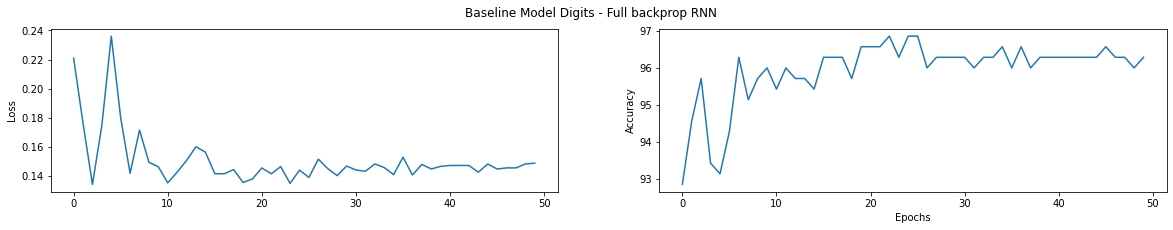

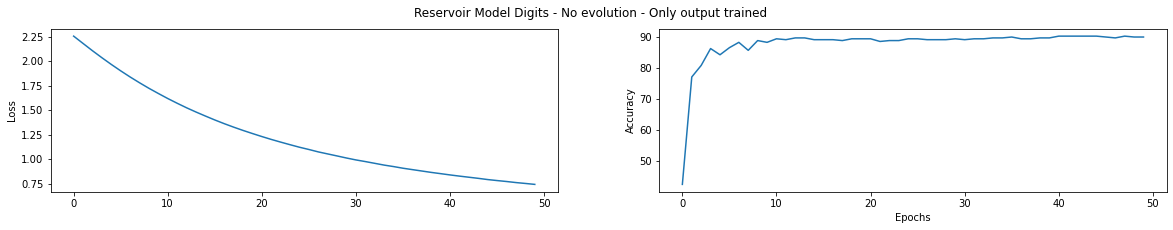

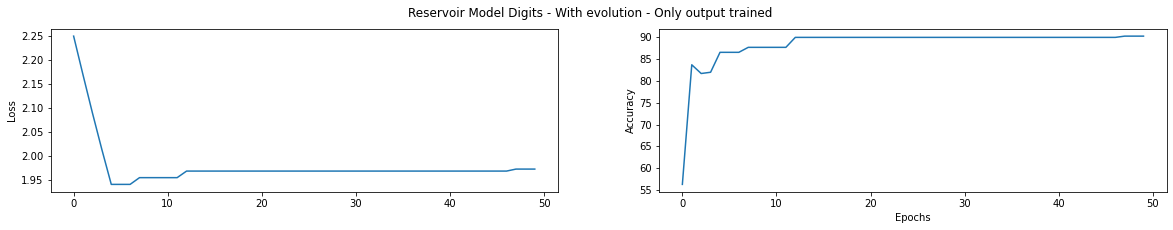

In [126]:
# Plot baseline - full backprop
plot_results(trained_bl_digits['epoch'], 
             trained_bl_digits['loss_results'], 
             trained_bl_digits['accuracy_results'],
            'Baseline Model Digits - Full backprop RNN')

# Plot reservoir - no evolution yet
plot_results(trained_res_digits['epoch'], 
             trained_res_digits['loss_results'], 
             trained_res_digits['accuracy_results'],
            'Reservoir Model Digits - No evolution - Only output trained')

# Plot reservoir - with evolution - best model
plot_results(best_pop_digits[0]['epoch'], 
             best_pop_digits[0]['loss_results'], 
             best_pop_digits[0]['accuracy_results'],
            'Reservoir Model Digits - With evolution - Only output trained')


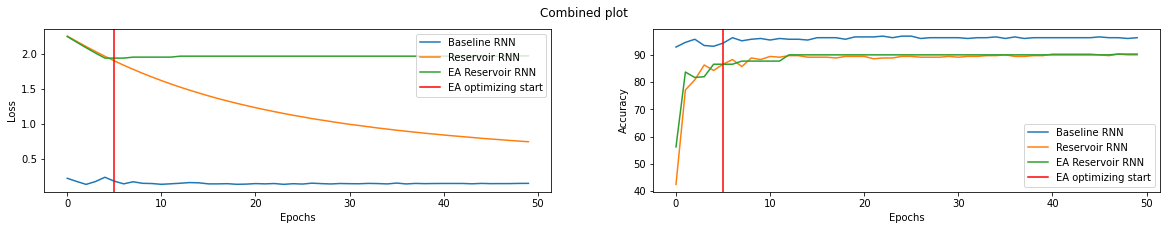

In [128]:
# Plot above plots in one plot

combined_plot_result(
            trained_bl_digits['epoch'],
            trained_bl_digits['loss_results'], 
            trained_bl_digits['accuracy_results'],
            trained_res_digits['loss_results'], 
            trained_res_digits['accuracy_results'],
            best_pop_digits[0]['loss_results'], 
            best_pop_digits[0]['accuracy_results'],
            border = backprop_epochs,
            label_bl = 'Baseline RNN',
            label_res = 'Reservoir RNN',
            label_evo = 'EA Reservoir RNN',
            title = 'Combined plot')

In [122]:
# Overview of the models structure

# Baseline RNN model
print(summary(bl_model_digits, torch.zeros(1, 64), show_input=True, show_hierarchical=False))

# Reservoir RNN model
print(summary(res_model_digits, torch.zeros(1, 64), show_input=True, show_hierarchical=False))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          Linear-1            [1, 128]          16,512          16,512
            Tanh-2            [1, 128]               0               0
          Linear-3            [1, 192]          24,704          24,704
            ReLU-4            [1, 128]               0               0
          Linear-5            [1, 192]          24,704          24,704
            ReLU-6            [1, 128]               0               0
          Linear-7            [1, 192]          24,704          24,704
            ReLU-8            [1, 128]               0               0
          Linear-9            [1, 192]          24,704          24,704
           ReLU-10            [1, 128]               0               0
         Linear-11            [1, 192]          24,704          24,704
           ReLU-12            [1, 128]               0               0
     

In [ ]:
# Load in digits data and perform training
# Takes a bit of time

#train_loader_mnist, val_loader_mnist, test_loader_mnist = get_mnist_loaders(batch_size=50)